In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym 
import random

In [3]:
env = gym.make('MountainCar-v0')


In [14]:
def Qlearning(env,learning_rate, discount_rate, episilon, episilon_min, episodes):
    num_state = (env.observation_space.high - env.observation_space.low)*np.array([10,100]) 
    num_state = np.round(num_state,0).astype(int) +1
    
    Q_table = np.zeros(shape= (num_state[0], num_state[1], env.action_space.n))
    
    reward_list = []
    ave_reward_list = []
    
    #Decay for each episode
    decay =  (episilon - episilon_min) / np.exp(-0.001 * episodes)
    
    # Q learning Algorithm
    for i in range(episodes):
        done = False
        state = env.reset()
        total_reward, reward = 0,0
        
        #Discretized the state
        state_discrete = (state - env.observation_space.low)*np.array([10,100])
        state_discrete = np.round(state_discrete,0).astype(int)
        
        while done != True:
            if i >= (episodes -20):
                    env.render()
                    
            #Episilon Greedy Algorithm
            
            if np.random.random() > episilon:
                action = np.argmax(Q_table[state_discrete[0],state_discrete[1]])
            else:
                action = np.random.randint(0, env.action_space.n)
                
            next_state, reward, done, info = env.step(action)
            
            # Discretized the nextstate 
            next_state_discrete = (next_state - env.observation_space.low)*np.array([10,100])
            next_state_discrete = np.round(next_state_discrete,0).astype(int)
            
            
            # Updating the Q table
            if done and next_state[0] >= 0.5:
                Q_table[state_discrete[0], state_discrete[1], action] = reward
                
            else:
                learned_value = learning_rate *(reward + discount_rate * np.max(Q_table[next_state_discrete[0], next_state_discrete[1]]) - Q_table[state_discrete[0],state_discrete[1], action])
                Q_table[state_discrete[0],state_discrete[1], action] += learned_value
            
            total_reward += reward
            state_discrete = next_state_discrete
            
        #Decaying the episilon value 
        if episilon > episilon_min:
            episilon -= decay
            
        #Tracking the reward
        reward_list.append(total_reward)
            
            
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
                
        if (i +1) % 100 == 0: 
            print("Episode {} Average Reward: {}".format(i+1, ave_reward))
            
    env.close()
    
    return ave_reward_list

In [17]:
# Running the Q_learning Algorithm
rewards = Qlearning(env,0.1,0.9,1,0.01,500)

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -197.02
Episode 500 Average Reward: -200.0


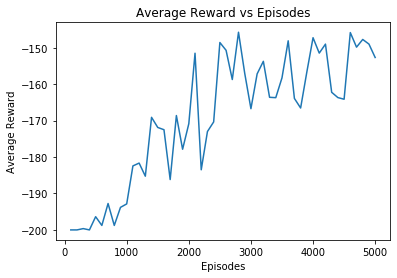

In [16]:
plt.plot(100*(np.arange(len(rewards)) +1),rewards)
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Average Reward vs Episodes")
plt.show()

In [6]:
env.reset().shape

(2,)

In [7]:
env.reset().reshape(1,2).shape

(1, 2)